In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
#this model predicts whether a person has diabetes or not
df = pd.read_csv('diabetes.csv')
x1 = df['Pregnancies'].values
x2 = df['Glucose'].values
x3 = df['BloodPressure'].values
x4 = df['SkinThickness'].values
x5 = df['Insulin'].values
x6 = df['BMI'].values
x7 = df['DiabetesPedigreeFunction'].values
x8 = df['Age'].values
y = df['Outcome'].values

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
#hypothesis for the logistic regression
def hypothesis(theta, x1, x2, x3, x4, x5, x6, x7, x8):
    hx = theta[0] + theta[1]*x1 + theta[2]*x2 + theta[3]*x3 + theta[4]*x4 + theta[5]*x5 + theta[6]*x6 + theta[7]*x7 +theta[8]*x8
    return sigmoid(hx)

In [24]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

In [25]:
#cost function
def cost(theta, x1, x2, x3, x4, x5, x6, x7, x8, y):
    e = 0
    m = x1.shape[0]
    for i in range(m):
        hx = hypothesis(theta, x1[i], x2[i], x3[i], x4[i], x5[i], x6[i], x7[i], x8[i])
        #check if hypothesis hx is giving output zero, if yes then don't perform log operation on it
        #this could lead to division by zero error
        #this happens because the sigmoid function can give either one or zero for some input featurs
        #so we need to check that values
        try:
            if hx == 0 or (1-hx)==0:
                pass
            else:
                e = e + (y[i]*np.log(hx)+(1-y[i])*np.log(1-hx))
        except:
            pass
    return e

In [26]:
#partial derivative of the cost function
def diffGradient(theta, x1, x2, x3, x4, x5, x6, x7, x8, y):
    grad = np.zeros((9,))
    m = x1.shape[0]
    for i in range(m):
        hx = hypothesis(theta, x1[i], x2[i], x3[i], x4[i], x5[i], x6[i], x7[i], x8[i])
        grad[0] = grad[0] + (hx - y[i])
        grad[1] = grad[1] + (hx - y[i])*x1[i]
        grad[2] = grad[2] + (hx - y[i])*x2[i]
        grad[3] = grad[3] + (hx - y[i])*x3[i]
        grad[4] = grad[4] + (hx - y[i])*x4[i]
        grad[5] = grad[5] + (hx - y[i])*x5[i]
        grad[6] = grad[6] + (hx - y[i])*x6[i]
        grad[7] = grad[7] + (hx - y[i])*x7[i]
        grad[8] = grad[8] + (hx - y[i])*x8[i]
    return grad

In [38]:
#iterative method to calculate the gradient descent
#actually this is called as gradient ascent, so we need to add theta values simulataneously rather than subtracting
def gradientDescent(x1, x2, x3, x4, x5, x6, x7, x8, y, learning_rate = 0.0001):
    max_iter = 300
    error_list = []
    m = x1.shape[0]
    theta = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    for i in range(max_iter):
        grad = diffGradient(theta, x1, x2, x3, x4, x5, x6, x7, x8, y)
        error = cost(theta, x1, x2, x3, x4, x5, x6, x7, x8, y)
        error_list.append(error)
        #simultaneously updating theta values
        theta[0] += learning_rate*(1/m)*grad[0]
        theta[1] += learning_rate*(1/m)*grad[1]
        theta[2] += learning_rate*(1/m)*grad[2]
        theta[3] += learning_rate*(1/m)*grad[3]
        theta[4] += learning_rate*(1/m)*grad[4]
        theta[5] += learning_rate*(1/m)*grad[5]
        theta[6] += learning_rate*(1/m)*grad[6]
        theta[7] += learning_rate*(1/m)*grad[7]
        theta[8] += learning_rate*(1/m)*grad[8]
    return theta, error_list

In [39]:
final_theta, error_list = gradientDescent(x1, x2, x3, x4, x5, x6, x7, x8, y)

In [40]:
print(final_theta)

[0.019375091899597748, 0.0638179897135391, 2.129726835777354, 1.3211350362757046, 0.38102349574381544, 1.3332162850821534, 0.5869543039709303, 0.008321244507140306, 0.6040355821540211]


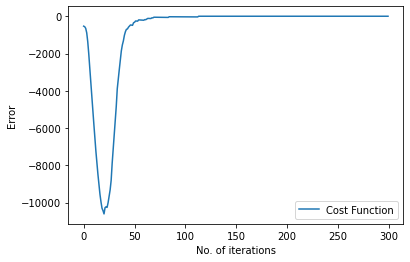

In [41]:
plt.plot(error_list, label = "Cost Function")
plt.xlabel("No. of iterations")
plt.ylabel("Error")
plt.legend()
plt.show()

In [42]:
def predict(theta, x1, x2, x3, x4, x5, x6, x7, x8):
    y_test = []
    for i in range(x1.shape[0]):
        t = -1
        hx = hypothesis(theta, x1, x2, x3, x4, x5, x6, x7, x8)
        if hx>=0.5:
            t = 1
        else:
            t = 0
        y_test.append(t)
    return y_test

In [43]:
prediction = predict(final_theta,np.array([0]),np.array([162]),np.array([76]),np.array([56]),np.array([100]),np.array([53.2]),np.array([0.759]),np.array([25]))

In [44]:
print(prediction) #1 represents that the patient has diabetes

[1]
